In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(18,6)})
pd.set_option('display.max_columns', None)

In [10]:
DF_spot_long = pd.read_csv("E:\\Academic\\DATA & INSIGHTS\\Wheat Prices Forecasting\\stage_data\\spot_long.csv")
DF_spot_long['time'] = pd.to_datetime(DF_spot_long['time'])

## Preprocessing data for modelling

### Dealing with Outliers

Removing Outliers After checkingthe time series and confirming them <br>
Nulls are replaced by nans to be imputed later

In [11]:
for i in DF_spot_long['Wheat_ID'].unique():
    q75 = DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i, 'price'].quantile(0.75)
    q25 = DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i, 'price'].quantile(0.25)
    q50 = DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i, 'price'].quantile(0.50)

    upper_bound = q50 + ((q75 - q25) * 2.5)
    lower_bound = q50 - ((q75 - q25) * 2.5)
                                                                            
    outliers = ((DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i, 'price'] > upper_bound) | (DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i, 'price'] < lower_bound))                                                                     
    print("Number of otliers removed in " + i , outliers.sum())
    DF_spot_long.loc[(DF_spot_long['Wheat_ID'] == i) & outliers, 'price'] = np.nan

Number of otliers removed in 2HRW-USG-A1 0
Number of otliers removed in 2SRW-USG-A1 1
Number of otliers removed in JCI-WHT-SHHAI 0
Number of otliers removed in JCI-WHT-GZHOU 0
Number of otliers removed in BRSB-APW1-CY1 0
Number of otliers removed in ALBN-AGP1-CY1 0
Number of otliers removed in ALBN-ASW1-CY1 1
Number of otliers removed in ALBN-AUH2-CY1 1
Number of otliers removed in W-FOBROUEN-P1 0
Number of otliers removed in W-RENLPL-P1 0
Number of otliers removed in W-FOBBLTNC-E14 0
Number of otliers removed in W-FOBBLT-E14 0
Number of otliers removed in W-FOBBLT-A13 0
Number of otliers removed in BW3-FOB-BALT 0
Number of otliers removed in DUR-BREAD-IT 0
Number of otliers removed in W-NGP-308 6
Number of otliers removed in KTS-W11UABS-FOB 0
Number of otliers removed in KTS-W12UABS-FOB 0
Number of otliers removed in W-FOBNOVG4-P1 11
Number of otliers removed in KTS-W11RUBS-FOB 0
Number of otliers removed in KTS-W12RUBS-FOB 0


### Imputing nulls

In [12]:
DF_spot_long = DF_spot_long.set_index('time')

<AxesSubplot:xlabel='Wheat_ID', ylabel='time'>

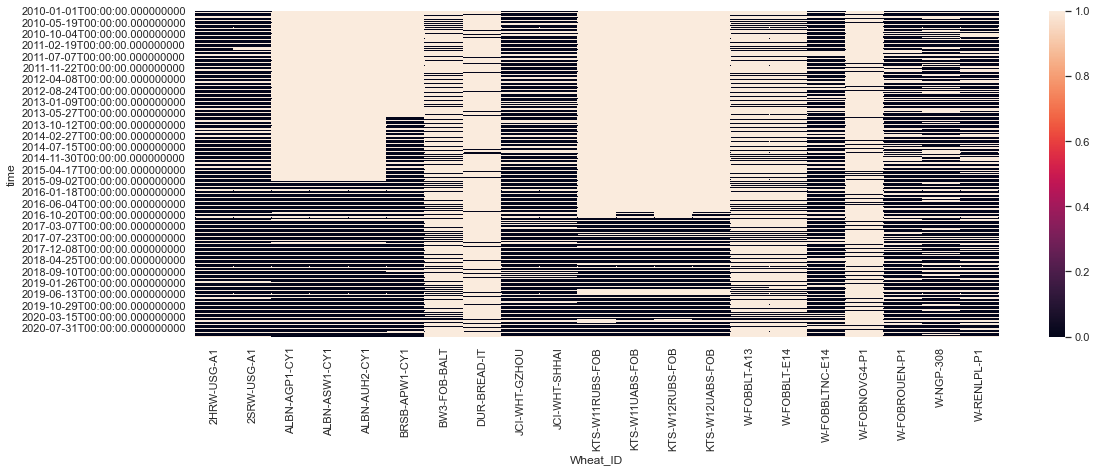

In [13]:
sns.heatmap(DF_spot_long.pivot(columns="Wheat_ID", values="price").isna())

In [14]:
col_lonull = [
    "2HRW-USG-A1", "2SRW-USG-A1", "JCI-WHT-SHHAI", "JCI-WHT-GZHOU",
    "W-FOBROUEN-P1", "W-RENLPL-P1", "W-FOBBLTNC-E14", "W-NGP-308"
]
col_hinull_clust = [
    "BRSB-APW1-CY1", "ALBN-AGP1-CY1", "ALBN-ASW1-CY1", "ALBN-AUH2-CY1",
    "KTS-W11UABS-FOB", "KTS-W12UABS-FOB", "KTS-W11RUBS-FOB", "KTS-W12RUBS-FOB"
]
col_hinull_noclust = [
    "W-FOBBLT-E14", "W-FOBBLT-A13", "BW3-FOB-BALT",
    "DUR-BREAD-IT", "W-FOBNOVG4-P1"
]

In [15]:
for i in col_lonull + col_hinull_clust:
    DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i,
                     'price'] = DF_spot_long.loc[DF_spot_long['Wheat_ID'] == i,
                                                 'price'].interpolate(
                                                     method='time', limit_area = 'inside')

<AxesSubplot:xlabel='Wheat_ID', ylabel='time'>

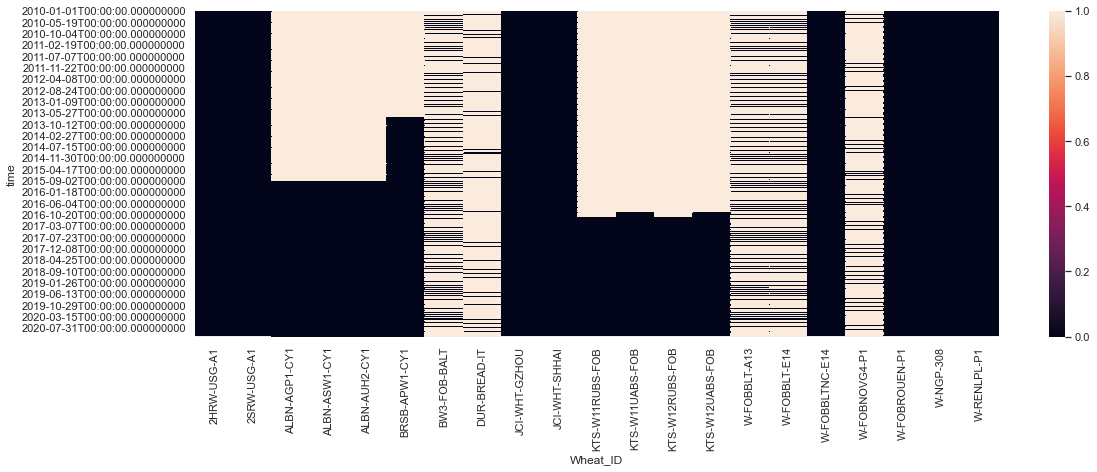

In [16]:
sns.heatmap(DF_spot_long.pivot(columns="Wheat_ID", values="price").isna())

In [17]:
DF_spot_long = DF_spot_long[~DF_spot_long['Wheat_ID'].isin(col_hinull_noclust)].dropna()

In [18]:
DF_spot_long.isna().sum()

Unnamed: 0    0
Wheat_ID      0
price         0
dtype: int64

In [19]:
DF_spot_long.reset_index().groupby('Wheat_ID').agg({'time': ['min', 'max','count']}).assign(delta=lambda x: x['time']['max'] - x['time']['min'])

time                      delta
                       min        max count          
Wheat_ID                                             
2HRW-USG-A1     2010-01-04 2020-11-16  3970 3969 days
2SRW-USG-A1     2010-01-04 2020-11-16  3970 3969 days
ALBN-AGP1-CY1   2015-09-16 2020-11-17  1890 1889 days
ALBN-ASW1-CY1   2015-09-16 2020-11-17  1890 1889 days
ALBN-AUH2-CY1   2015-09-16 2020-11-17  1890 1889 days
BRSB-APW1-CY1   2013-08-01 2020-11-17  2666 2665 days
JCI-WHT-GZHOU   2010-01-04 2020-11-16  3970 3969 days
JCI-WHT-SHHAI   2010-01-04 2020-11-16  3970 3969 days
KTS-W11RUBS-FOB 2016-11-22 2020-11-13  1453 1452 days
KTS-W11UABS-FOB 2016-09-23 2020-11-13  1513 1512 days
KTS-W12RUBS-FOB 2016-11-22 2020-11-13  1453 1452 days
KTS-W12UABS-FOB 2016-09-23 2020-11-13  1513 1512 days
W-FOBBLTNC-E14  2010-01-04 2020-11-16  3970 3969 days
W-FOBROUEN-P1   2010-01-05 2020-11-16  3969 3968 days
W-NGP-308       2010-01-04 2020-11-13  3967 3966 days
W-RENLPL-P1     2010-01-05 2020-11-16  3969 3968 days

Preprocessing Summary:
- We have removed outliers using a more tolerent threshold after visualising to prevent losing any real data.
- We have filled Nulls accordingly:
    - in low nulls, time serieses with linear interpolation using time
    - in time clustered high nulls, only the existing time will be used and filled, while olld not existing times will be dropped
    - in non clustered high nulls, will be dropped for now from analysis
- We have made sure that data is now having a proper time step and that all steps values exist

In [ ]:
# DF_spot_long.to_csv('E:\Academic\DATA & INSIGHTS\Wheat Prices Forecasting\stage_data\spot_long_preprocessed.csv')

# Refrences
1- De Luca, Anna I., An Overview of Global Wheat Market Fundamentals in an Era of Climate Concerns, International Journal of Agronomy, 2017,  https://doi.org/10.1155/2017/3931897